### Classification

#### Using the Mnist Dataset

In [12]:
# Project requires the use of Python 3.8 and above
import sys

assert sys.version_info >= (3, 8)

In [13]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Folder for saving visuals

In [15]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [16]:
# Fetch our Dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

C:\Users\KLAUS\reptile\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [17]:
# Describe the dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [18]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [19]:
X,y = mnist["data"], mnist["target"]
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
X.shape

(70000, 784)

In [21]:
28*28

784

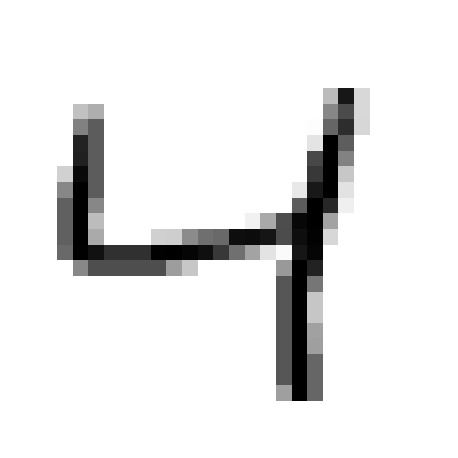

In [23]:
# Image of a number
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[2]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

In [24]:
y[2]

'4'

In [25]:
p_array = np.array([1,2,3,4,5])
p_array

array([1, 2, 3, 4, 5])

In [26]:
p_array[0]

1

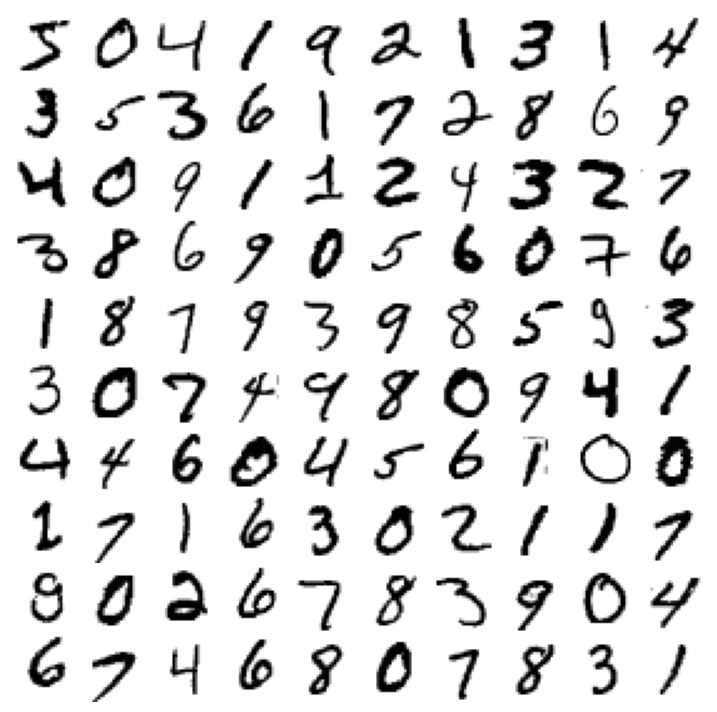

In [27]:
# Generate numbers from the dataset
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [28]:
# Split my dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [29]:
# Train a Binary Classifier
# We want to identify a digit '4'
# Classes is '5'and 'non-4'
y_train_4 = (y_train == '4')
y_test_4 = (y_test == '4')

In [30]:
# The classifier: Stochastic Gradient Descent
# The intuition - Step by step, random selections, updates model parameters frequently

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(random_state=42)

In [34]:
# Predict
sgd_clf.predict([some_digit])

array([ True])

In [35]:
# Performance measures
# Accuracy
# 1. k-fold Cross-validation

In [37]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring="accuracy")

array([0.9671 , 0.97645, 0.9687 ])

In [38]:
# On average, we have a 95% accuracy
# A dummy classifier

In [39]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_4)
print(any(dummy_clf.predict(X_train)))

False


In [41]:
cross_val_score(dummy_clf, X_train, y_train_4, cv=3, scoring="accuracy")

array([0.90265, 0.90265, 0.9026 ])

### Confusion Matrix

In [69]:
# 1. Accuracy 
# 2. Precision 
# 3. Recall 
# 4. f1 score

# Each of these metrics provides different insights into the performance of a classification model.

In [42]:
# import libraries 
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [43]:
# Example true labels and predicted labels
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0]) # Ground Truth/Historical Data
y_pred = np.array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0]) # Predicted Labels/Algorithms work

In [44]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4 1]
 [1 4]]


In [45]:
from IPython import display
#display.Image('confusion_matrix_2_2.png')

In [46]:
# The Top-left cell: 4(TP) - True Positive: Correctly Predicted Positive Instances
# The Bottom-Right cell: 4(TN) - True Negative: Correctly Predicted Negative Instances
# The Top-Right cell: 1(FN) - False Negative: Incorrectly Predicted as Negative 
# The botton-left cell: 1(FP) - False Positive: Incorrectly Predicted as Positive 

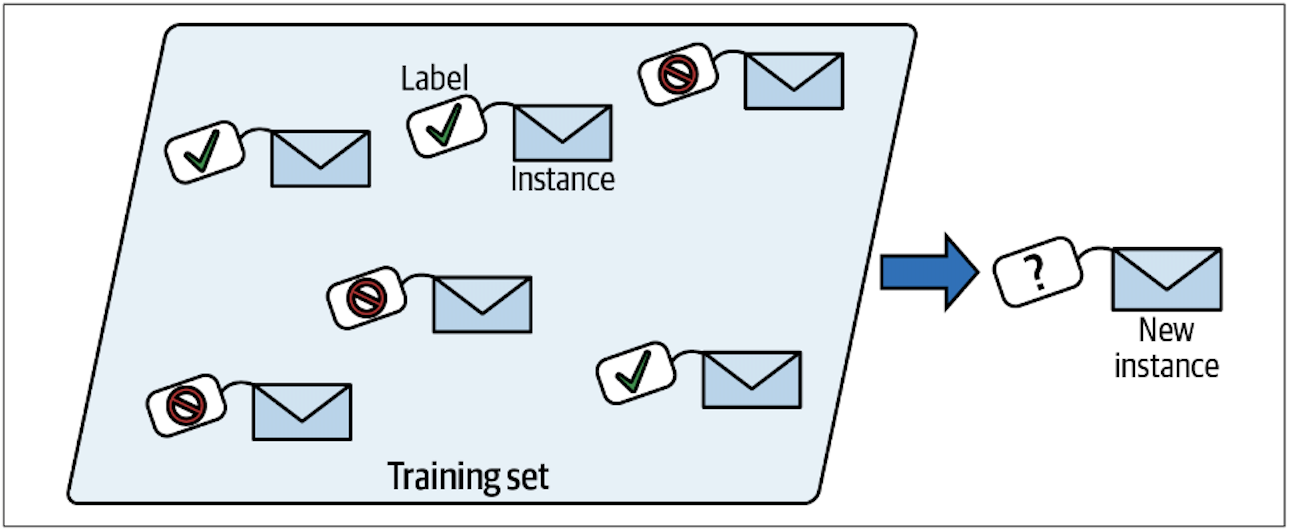

In [47]:
display.Image('classification.png')

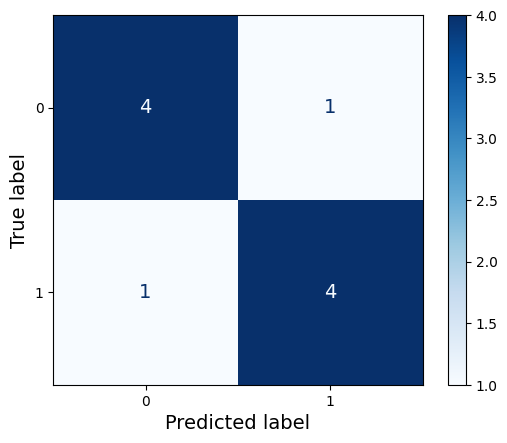

In [85]:
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [113]:
# Accuracy - The ratio of correctly predicted instance to the total instance 
# TP + TN/ TP + TN + FP + FN
8 / 10
# 80%

0.8

In [48]:
# Example true labels and predicted labels
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0]) # Ground Truth/Historical Data
y_pred = np.array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0]) # Predicted Labels/Algorithms work

In [49]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4 1]
 [1 4]]


In [50]:
# Precision - The ratio of True Positive predictions to the total positive predictions 
# TP/ TP + FP
4/ (4 + 1)

0.8

In [51]:
# The Top-left cell: 4(TP) - True Positive: Correctly Predicted Positive Instances
# The Bottom-Right cell: 4(TN) - True Negative: Correctly Predicted Negative Instances
# The Top-Right cell: 1(FN) - False Negative: Incorrectly Predicted as Negative 
# The botton-left cell: 1(FP) - False Positive: Incorrectly Predicted as Positive 

In [52]:
# Recall - The ratio of True Positive predictions to the total True positives and False Negatives
# tp/(tp+fn)
4/ (4+1)

0.8

In [53]:
# f1 score - The harmonic mean of precision and recall 
# 2 *(recall * precision/recall + precision)
2 * (0.8 * 0.8)/(0.8 + 0.8)

0.8000000000000002

### Confusion Matrix with the SGD

In [56]:
# Example data
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
# Ground Truth
y_train_4

array([False, False,  True, ..., False, False, False])

In [58]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3)

In [61]:
# The performance of the sgd classifier
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_4, y_train_pred)
cm

array([[52957,  1201],
       [  554,  5288]], dtype=int64)

In [60]:
# The Top-left cell: TP
# The Bottom-Right cell: TN
# The Top-Right cell: FP
# The botton-left cell: FN